In [2]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")
from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

__Problem Definition__
We are going to use Logistic Regression to build a model which will predict propensity (probability) of customers responding to a personal loan campaign. The probabilities from the model will be used to classify the outcome and identify variables that influence the response.

__Data Clean-up and Preparation__

__Q1 Read the column description and ensure you understand each attribute well__

In [3]:
df  = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


The attributes can be divided accordingly :

The variable ID does not add any interesting information. 
There is no association between a person's ID and loan, also it does not provide any 
general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

    Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
    Securities Account - Does the customer have a securities account with the bank?
    CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
    Online - Does the customer use internet banking facilities?
    Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:
    Age - Age of the customer
    Experience - Years of experience
    Income - Annual income in dollars
    CCAvg - Average credit card spending
    Mortage - Value of House Mortgage

Ordinal Categorical Variables are:
    Family - Family size of the customer
    Education - education level of the customer
    
The nominal variable is :
    ID
    Zip Code

In [5]:
#Neglecting variable ID for our model prediction.
df_new = df.drop('ID',axis=1)
df_new.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
## finding the null and missing values in the dataset
df_new.apply(lambda x : sum(x.isnull()))
## There are no missing values in the dataset.

Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [7]:
print(df_new.shape)
print(df_new.info())

(5000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIP Code             5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB
None


In [8]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
SecuritiesAccount,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [9]:
df_new.apply(lambda x: len(x.unique()))

Age                   45
Experience            47
Income               162
ZIP Code             467
Family                 4
CCAvg                108
Education              3
Mortgage             347
PersonalLoan           2
SecuritiesAccount      2
CDAccount              2
Online                 2
CreditCard             2
dtype: int64

__Q2 Study the data distribution in each attribute, share your findings. (5 points)__

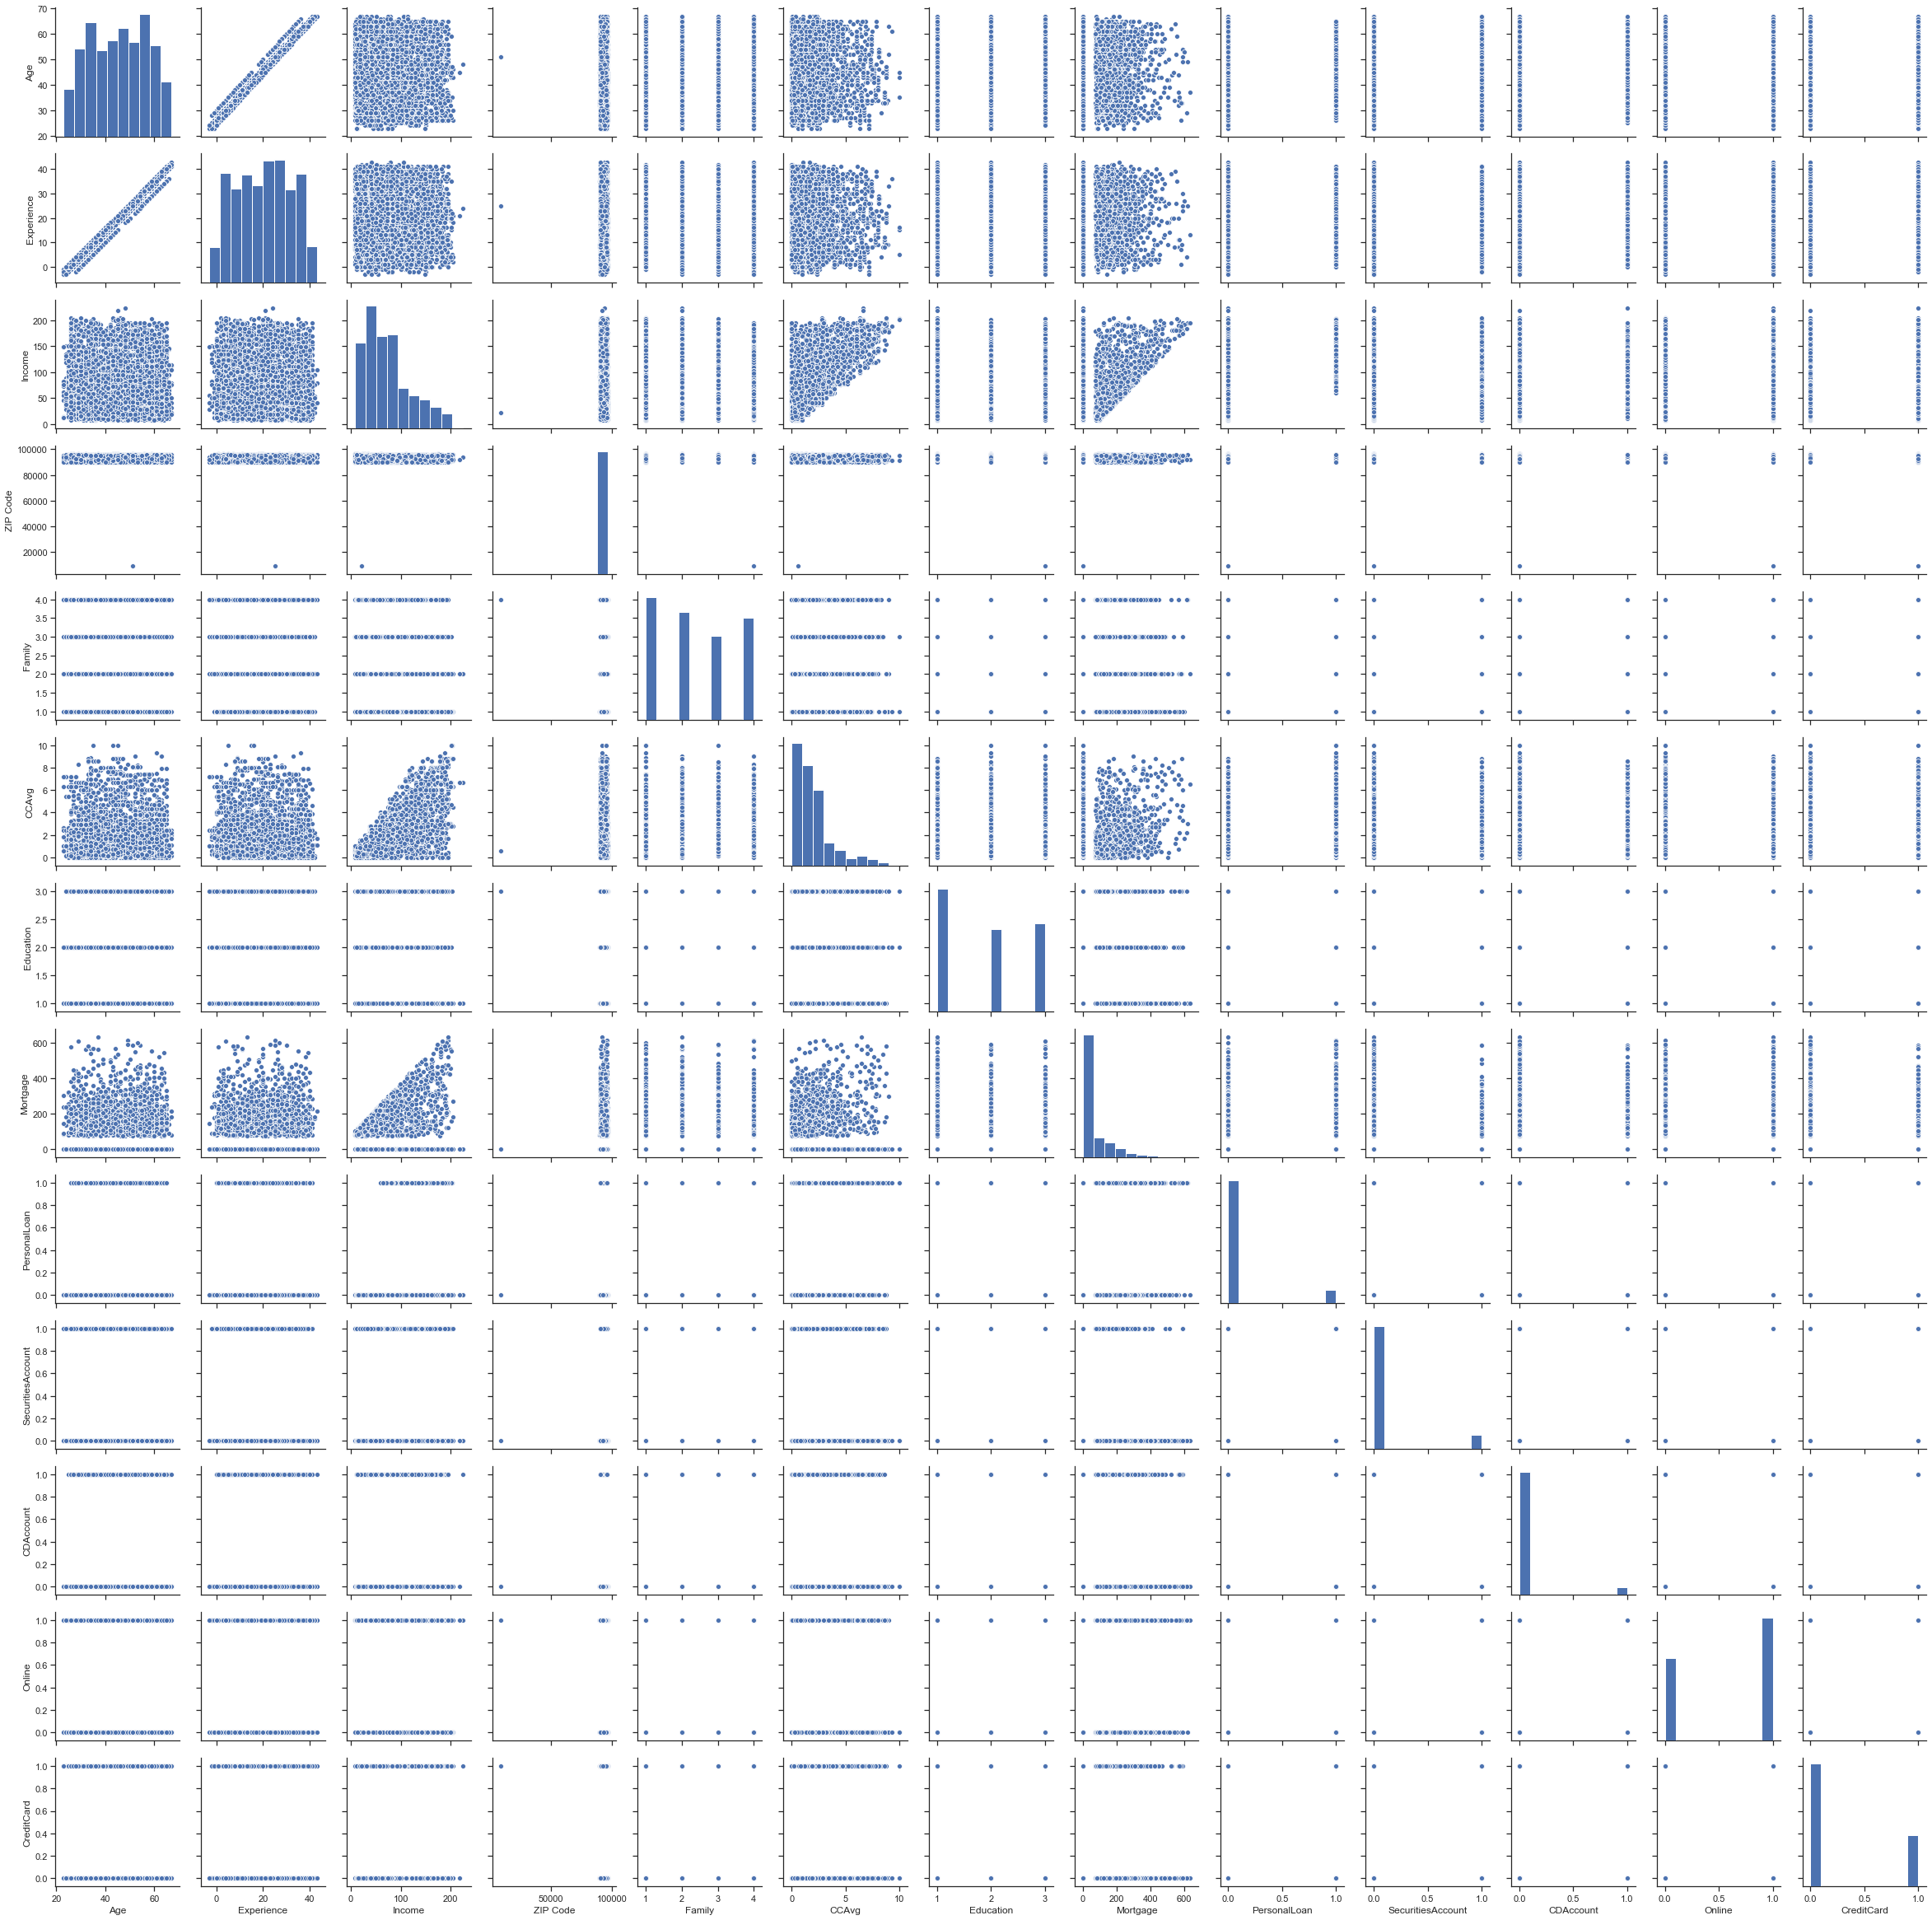

In [10]:
plt = sns.pairplot(df_new[['Age','Experience','Income','ZIP Code','Family','CCAvg' ,'Education' , 
                       'Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']] )


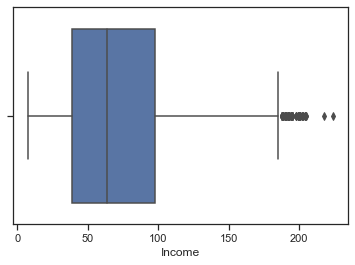

In [11]:
sns.boxplot(df_new['Income'])

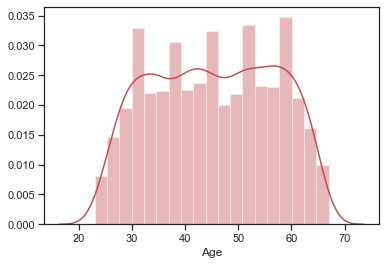

In [12]:
sns.distplot( df['Age'], color = 'r')

__Observations__

1. Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls 
in the range of 5 to 35 years and most earn an income between 10K to 100K.
2. Experience is normally distributed with more customer having experience starting from 8 years. 
3. Income is positively skewed. Majority of the customers have income between 45K and 55K.
4. CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
5. Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

__Negative experience cleaning__
Before proceeding any further we need to clean the same

In [13]:
df_new[df_new['Experience'] < 0]['Experience'].count()
#clean the negative variable
dfExp = df.loc[df['Experience'] >0]
negExp = df.Experience < 0
column_name = 'Experience'
mylist = df.loc[negExp]['ID'].tolist() # getting the customer ID who has negative exp


In [14]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

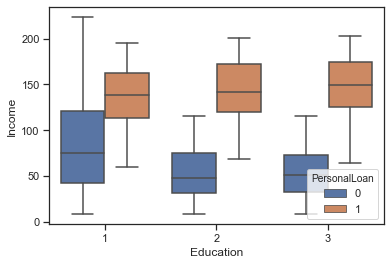

In [15]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=df_new)

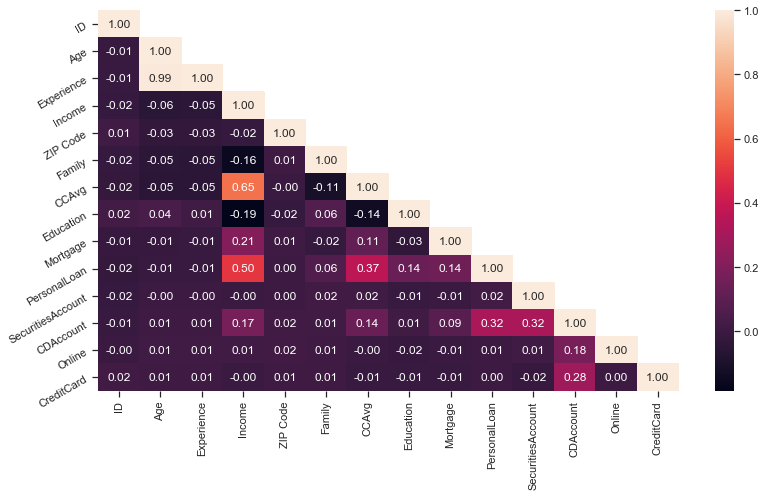

In [16]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observation

Income and CCAvg is moderately correlated.
Age and Experience is highly correlated

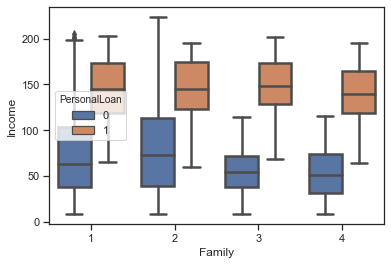

In [17]:
sns.boxplot(x=df.Family,y=df.Income,hue=df.PersonalLoan)

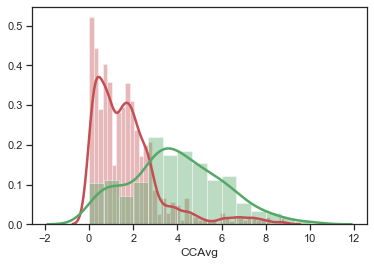

In [18]:

sns.distplot( df[df.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['CCAvg'], color = 'g')

In [19]:
print('Credit card spending of Non-Loan customers: ',df[df.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df[df.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


Text(0, 0.5, 'Age')

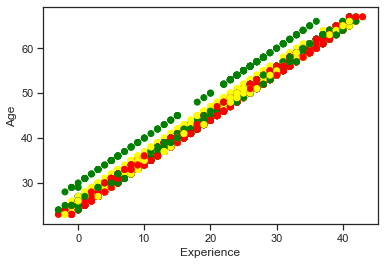

In [22]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(df['Experience'],df['Age'],c=df['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')

Observation
The above plot show with experience and age have a positive correlation.

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [24]:
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

Naive Bayes

In [25]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

KNN ( K - Nearest Neighbour )

In [26]:
train_set_indep = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_dep = df["PersonalLoan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [27]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


In [32]:
from sklearn import linear_model
lnr = linear_model.LogisticRegressionCV()
lnr.fit(X_Train, Y_Train)    
predicted_lnr = lnr.predict(X_Test)
from sklearn.metrics import accuracy_score
acc_lnr = accuracy_score(Y_Test, predicted_lnr)
print(acc_lnr)

C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9126084056037358


In [41]:
X=df.drop(['PersonalLoan','Experience','ID'],axis=1)
y=df.pop('PersonalLoan')

KNN: 0.898600 (0.008902)


C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\50033141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly

LinReg: 0.922000 (0.014940)
NB: 0.885600 (0.010385)


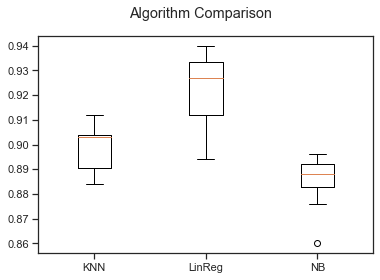

In [42]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LinReg', linear_model.LogisticRegressionCV()))
models.append(('NB', GaussianNB()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Conclusion:
Three classification algorithms were used in this study. From the above graph , 
it seems like Linear Regression algorithm have the highest accuracy and we can choose that as our final model